
🔥 Model 'cnn' Evaluation:
R²: 0.9126
MAE: 65.3335
MSE: 10121.4709
Single CNN model metrics: {'R²': 0.9125959038277051, 'MAE': 65.33348707719283, 'MSE': 10121.4709056294}
Single CNN Predictions: [ 518.073    479.93182  693.3072   535.4211   581.6879  1087.9059
  435.12244]


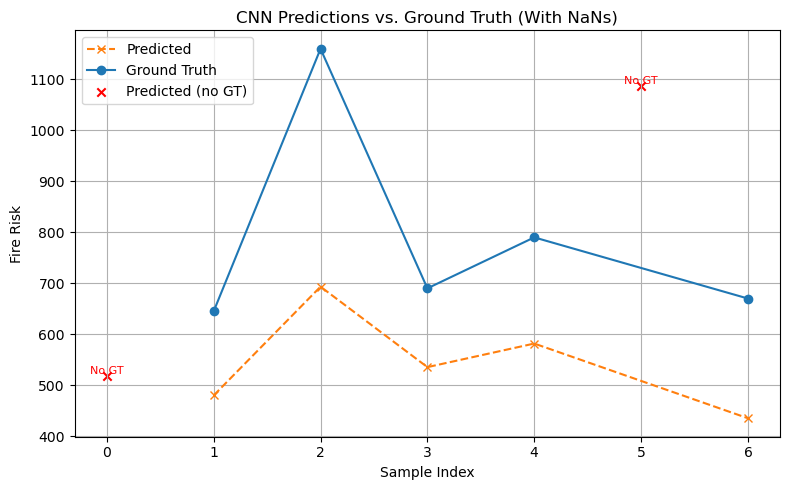

In [2]:
# ✅ Test paths
train_path = "example_train_rc.xlsx"
test_path = "example_test_rc.xlsx"

import sys
import os

# Add the parent directory (project root) to sys.path
sys.path.append(os.path.abspath(".."))

# 🔁 Imports
from regressorpipeline.train import train_fire_model, train_multiple_cnn_for_fire
from regressorpipeline.predict import (
    load_model_bundle,
    predict_fire_risk,
    predict_fire_risk_from_models,
)
from regressorpipeline.visualize import (
    plot_fire_risk_surface_matplotlib,
    plot_predictions_with_nan,  # ✅ your reusable plotting function
)

import pandas as pd
import numpy as np
import joblib
import torch
import statsmodels.api as sm
from sklearn.base import BaseEstimator

# ✅ Ground truth (example)
true_values = [np.nan, 645, 1160, 690, 790, np.nan, 670]
true_values = np.array(true_values, dtype=np.float32)

# 🔧 1. Train and evaluate a single CNN model
model, metrics = train_fire_model("cnn", train_path, save=True,scale_mode="robust")
print("Single CNN model metrics:", metrics)

# 🔍 2. Load and test prediction (single CNN model)
models, scaler_X, scaler_y, feature_names = load_model_bundle("best_cnn_model.joblib")
preds = predict_fire_risk(
    models[0],
    scaler_X,
    scaler_y,
    test_path,
    feature_names=feature_names,
    model_type="cnn"
)
print("Single CNN Predictions:", preds)

# ✅ 3. Plot actual vs. predicted with NaNs preserved
plot_predictions_with_nan(
    true_values=true_values,
    predicted_values=preds,
    title="CNN Predictions vs. Ground Truth (With NaNs)"
)


🔥 CNN Ensemble Evaluation:
R²: 0.9270
MAE: 57.2779
MSE: 8455.6974
Ensemble metrics: {'R²': 0.9269807128318808, 'MAE': 57.2779297395186, 'MSE': 8455.697421377625}
Averaged Ensemble Predictions: [ 412.2365   265.81888 1196.9451   591.667    604.3634  1458.5005
  382.58572]
True values: [nan, 645, 1160, 690, 790, nan, 670]


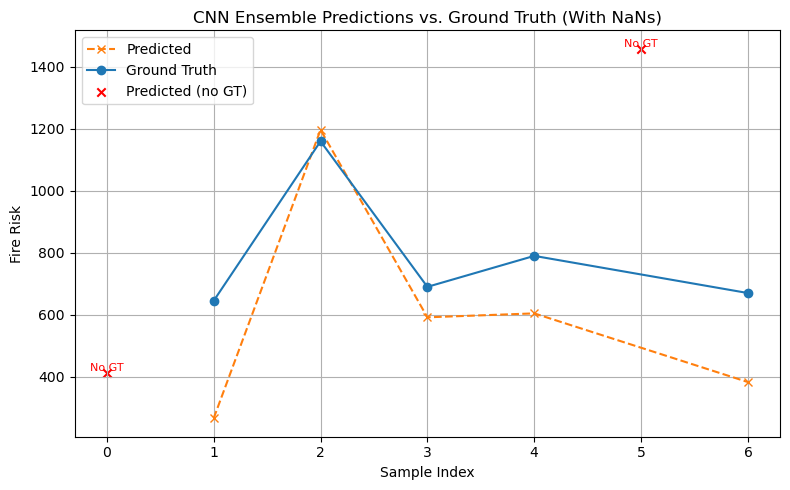

In [3]:
# 🔧 2. Train CNN ensemble (3 runs) and save
models, metrics_list, ensemble_metrics = train_multiple_cnn_for_fire(
    train_path, n_runs=3, save=True,scale_mode="minmax")

print("Ensemble metrics:", ensemble_metrics)

# 🔍 4. Load and test ensemble prediction
models, scaler_X, scaler_y, feature_names = load_model_bundle("cnn_ensemble.joblib")
avg_preds = predict_fire_risk_from_models(
    models,
    scaler_X,
    scaler_y,
    test_path,
    feature_names=feature_names,
    model_type="cnn"
)
print("Averaged Ensemble Predictions:", avg_preds)

# ✅ Ground truth
true_values = [np.nan, 645, 1160, 690, 790, np.nan, 670]
print("True values:", true_values)

# ✅ Plot predicted vs. ground truth (with NaNs preserved)
from regressorpipeline.visualize import plot_predictions_with_nan

plot_predictions_with_nan(
    true_values=true_values,
    predicted_values=avg_preds,
    title="CNN Ensemble Predictions vs. Ground Truth (With NaNs)"
)


🔥 CNN Ensemble Evaluation:
R²: 0.9308
MAE: 52.1400
MSE: 8011.0438
Ensemble metrics: {'R²': 0.9308205246596993, 'MAE': 52.14001388983293, 'MSE': 8011.043847914148}
Averaged Ensemble Predictions: [ 382.74625  241.41904 1287.9205   516.8901   567.5735  1455.0497
  380.5151 ]
True values: [nan, 645, 1160, 690, 790, nan, 670]


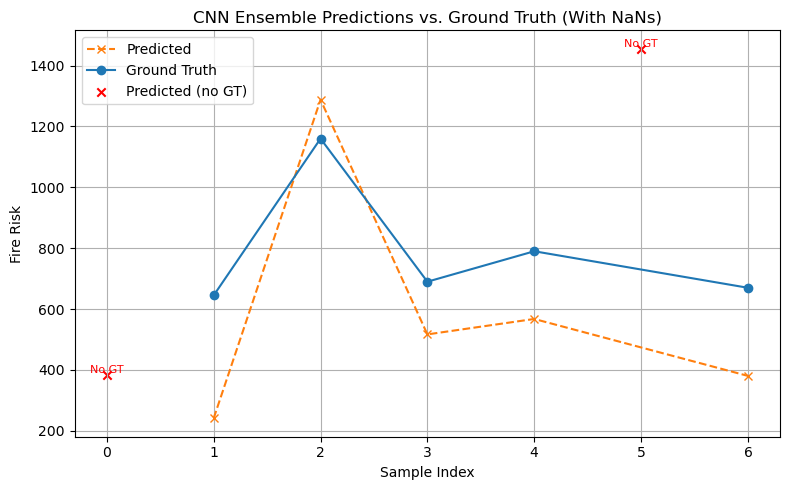

In [4]:
# 🔧 2. Train CNN ensemble (10 runs) and save
models, metrics_list, ensemble_metrics = train_multiple_cnn_for_fire(
    train_path, n_runs=10, save=True,scale_mode="minmax")
print("Ensemble metrics:", ensemble_metrics)

# 🔍 4. Load and test ensemble prediction
models, scaler_X, scaler_y, feature_names = load_model_bundle("cnn_ensemble.joblib")
avg_preds = predict_fire_risk_from_models(
    models,
    scaler_X,
    scaler_y,
    test_path,
    feature_names=feature_names,
    model_type="cnn"
)
print("Averaged Ensemble Predictions:", avg_preds)

# ✅ Ground truth
true_values = [np.nan, 645, 1160, 690, 790, np.nan, 670]
print("True values:", true_values)

# ✅ Plot predicted vs. ground truth (with NaNs preserved)
from regressorpipeline.visualize import plot_predictions_with_nan

plot_predictions_with_nan(
    true_values=true_values,
    predicted_values=avg_preds,
    title="CNN Ensemble Predictions vs. Ground Truth (With NaNs)"
)

In [ ]:
# 🔧 2. Train CNN ensemble (30 runs) and save
models, metrics_list, ensemble_metrics = train_multiple_cnn_for_fire(
    train_path, n_runs=30, save=True,scale_mode="minmax")


# 🔍 4. Load and test ensemble prediction
models, scaler_X, scaler_y, feature_names = load_model_bundle("cnn_ensemble.joblib")
avg_preds = predict_fire_risk_from_models(
    models,
    scaler_X,
    scaler_y,
    test_path,
    feature_names=feature_names,
    model_type="cnn"
)
print("Averaged Ensemble Predictions:", avg_preds[:5])

# ✅ Ground truth
true_values = [np.nan, 645, 1160, 690, 790, np.nan, 670]
print("True values:", true_values)

# ✅ Plot predicted vs. ground truth (with NaNs preserved)
from regressorpipeline.visualize import plot_predictions_with_nan

plot_predictions_with_nan(
    true_values=true_values,
    predicted_values=avg_preds,
    title="CNN Ensemble Predictions vs. Ground Truth (With NaNs)")


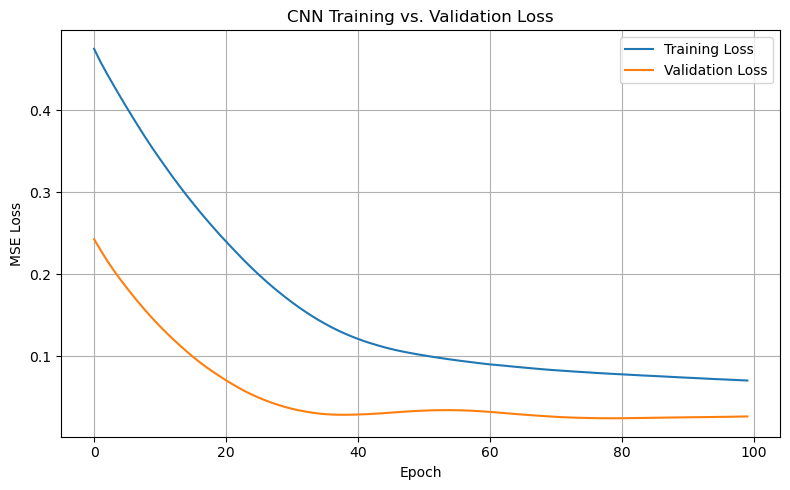

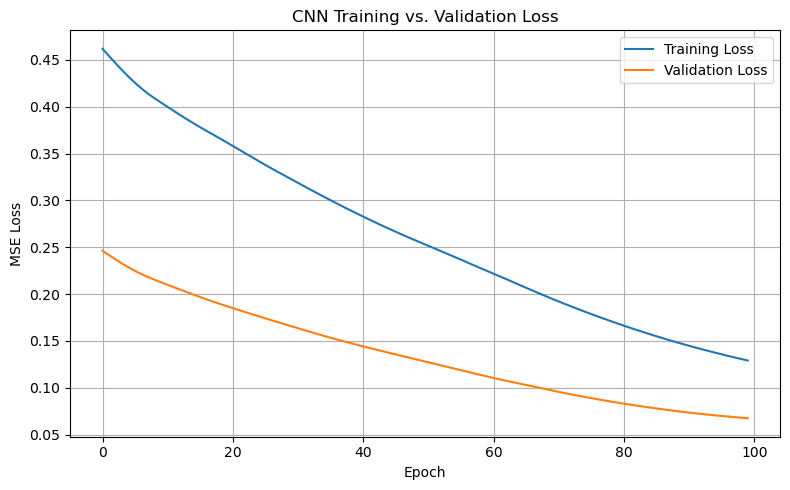

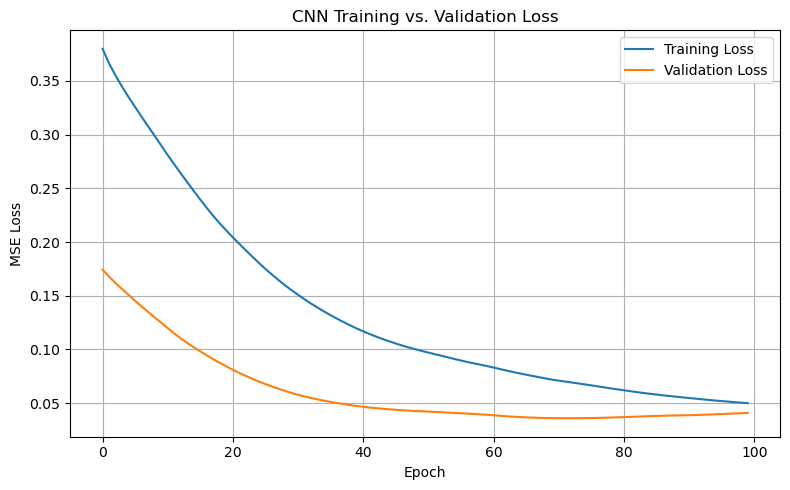

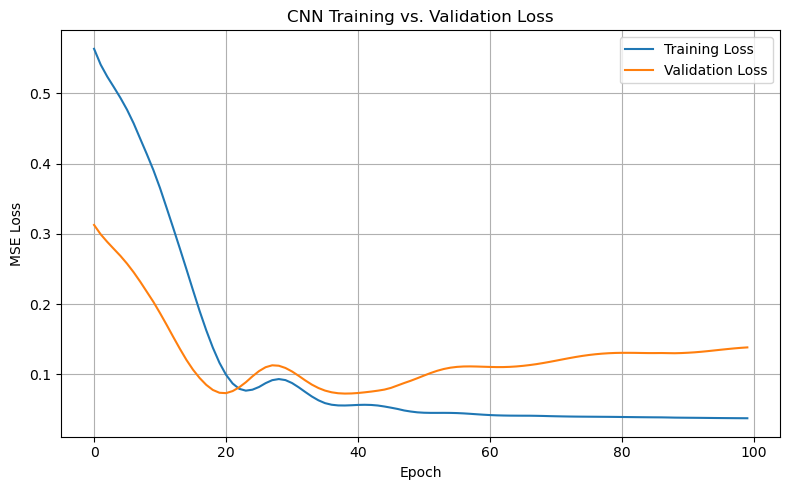

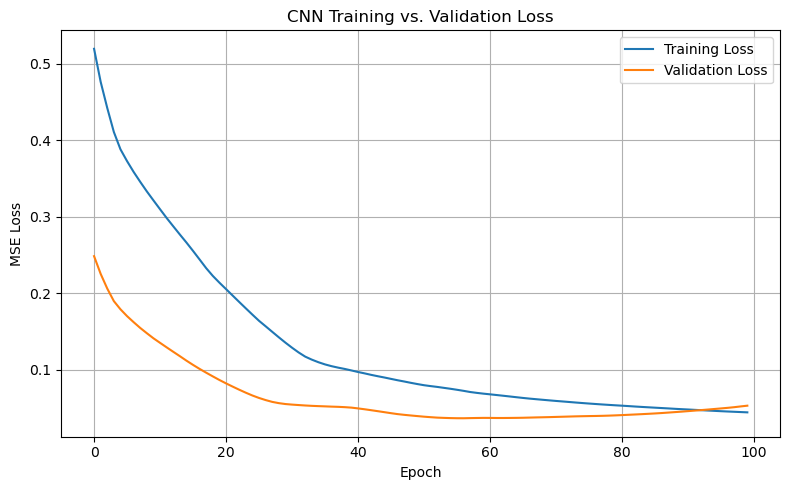

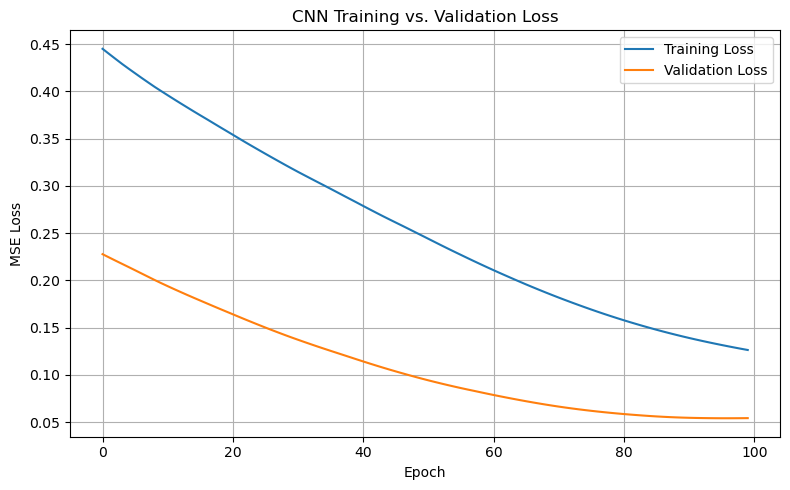

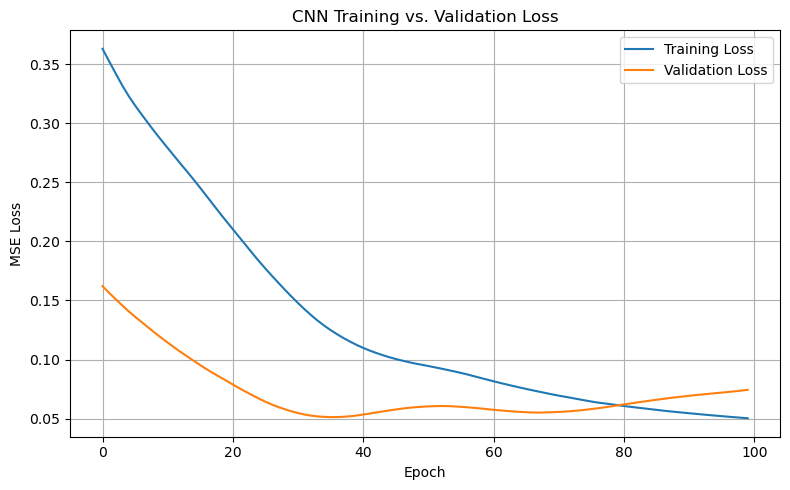

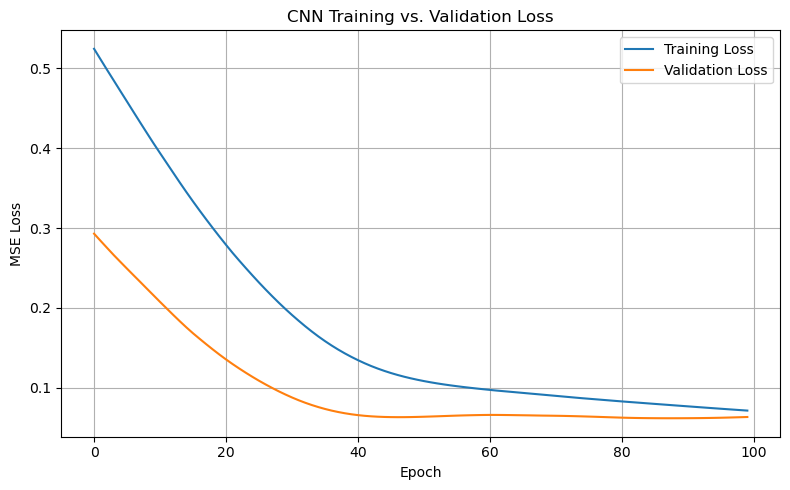

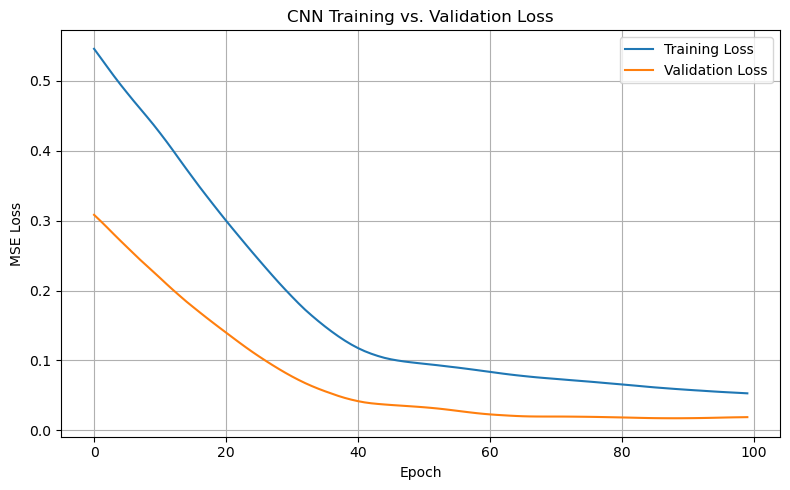

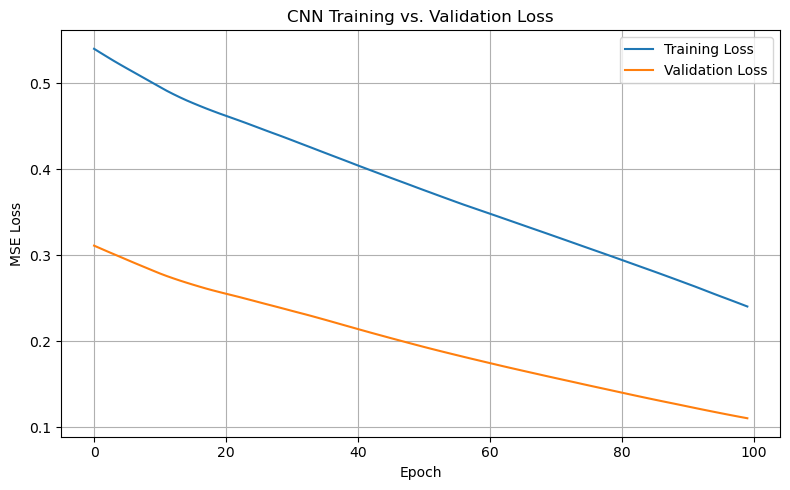

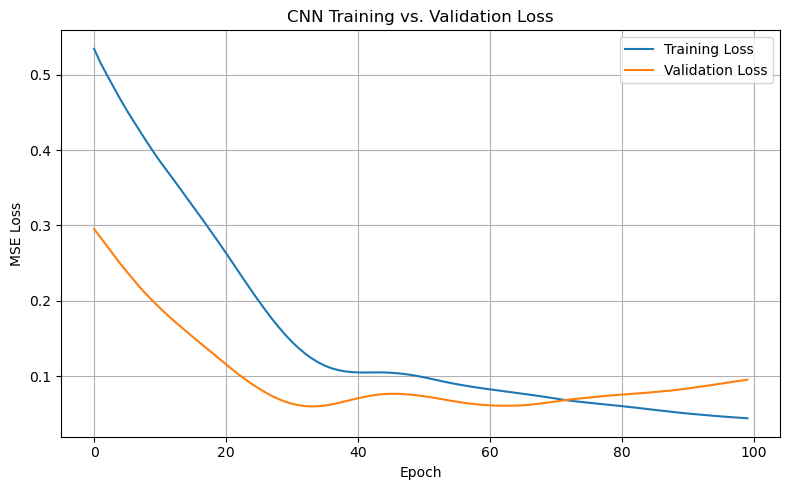

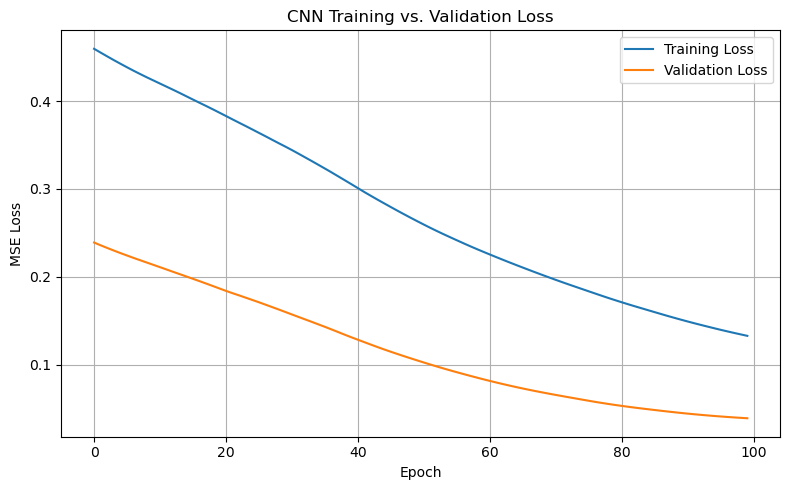

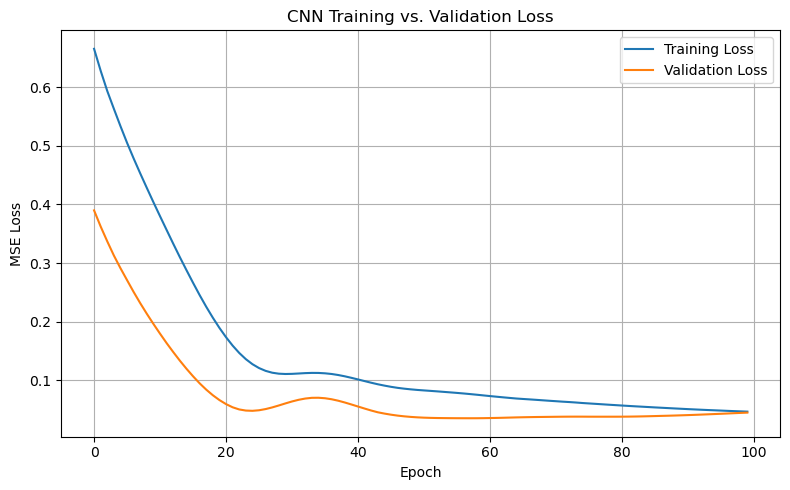

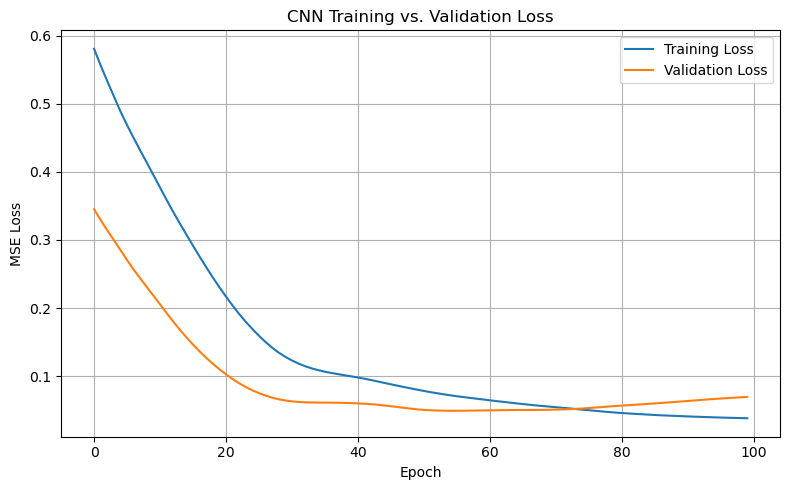

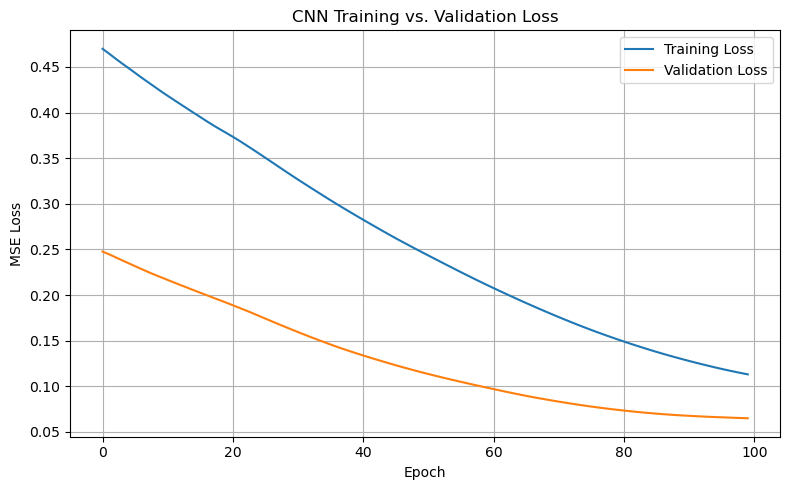

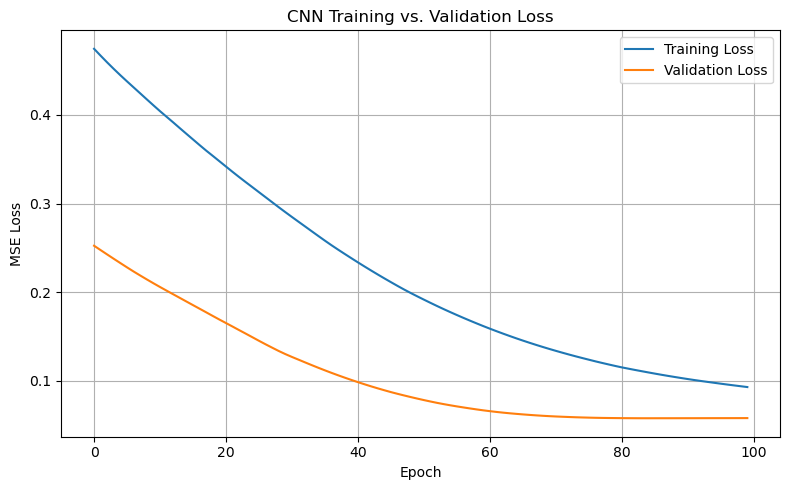

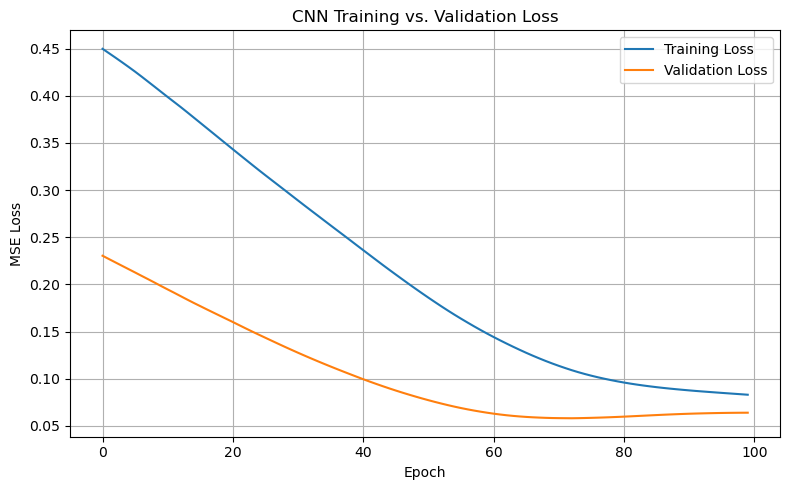

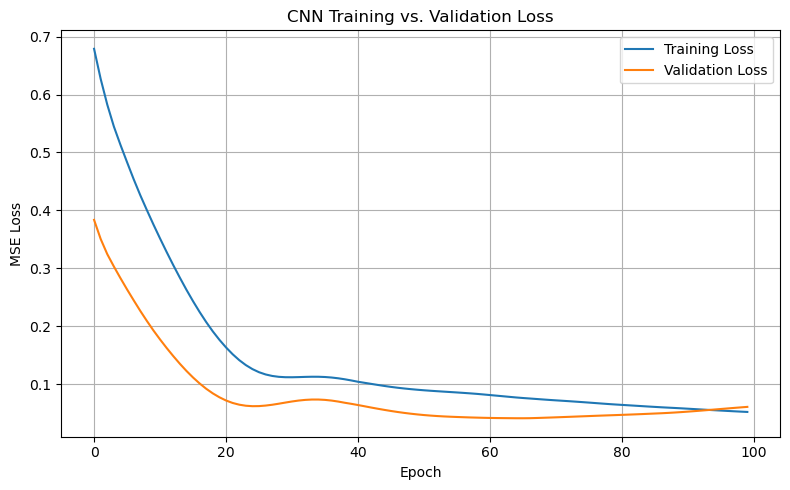

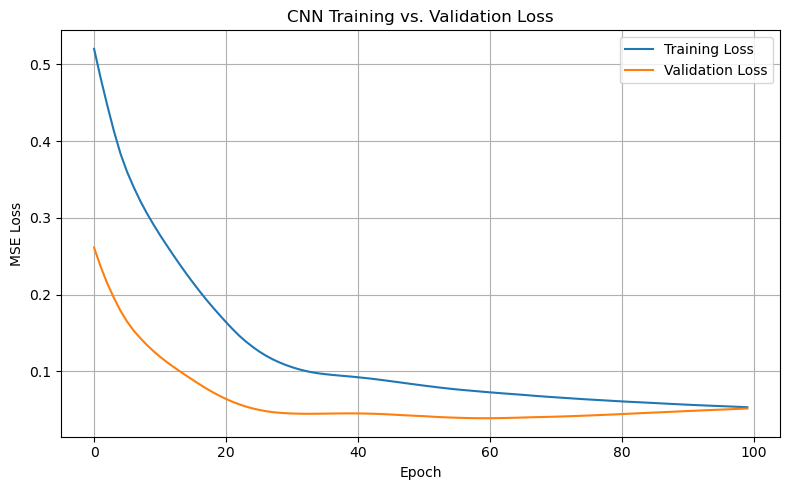

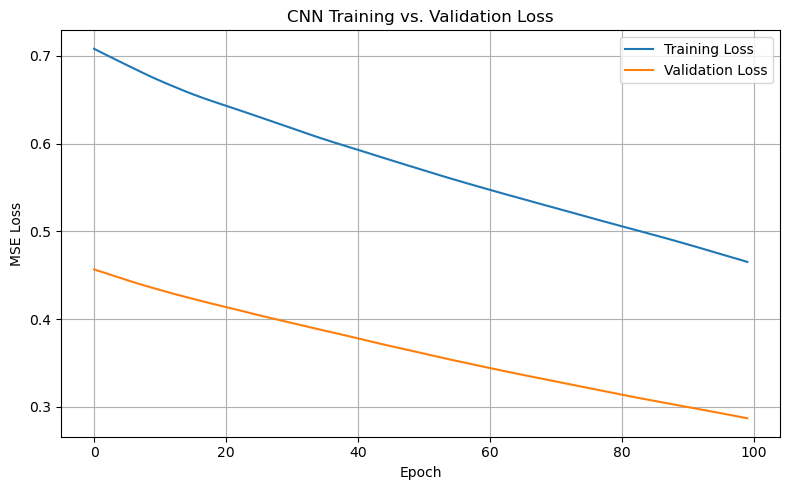

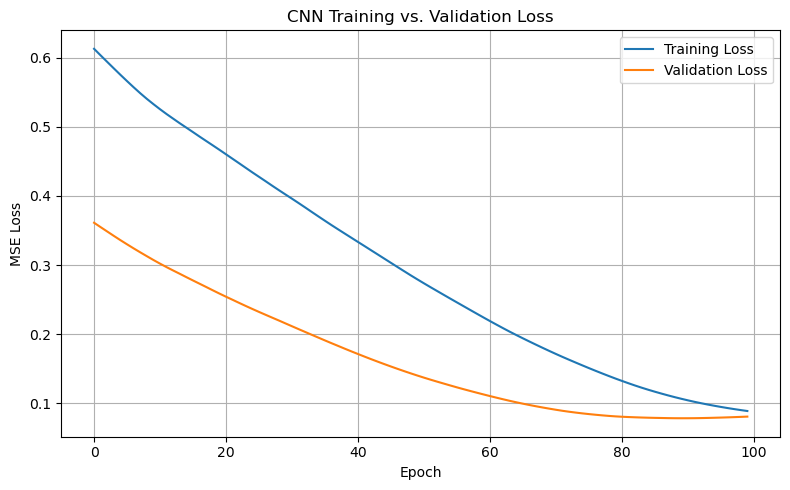

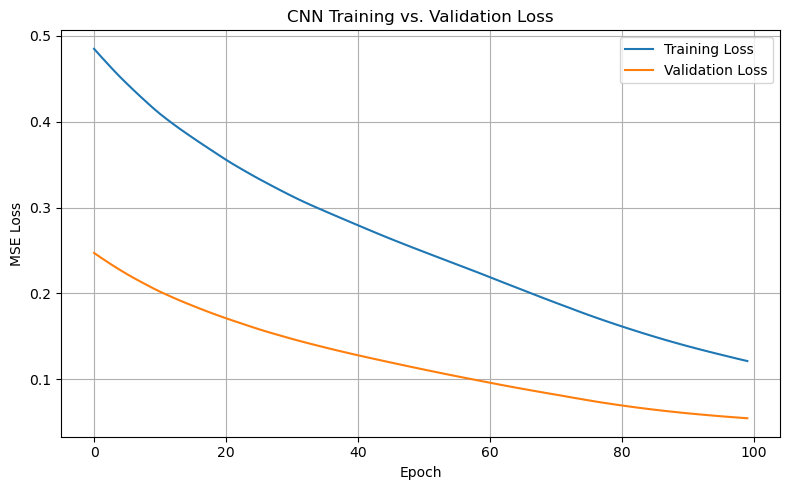

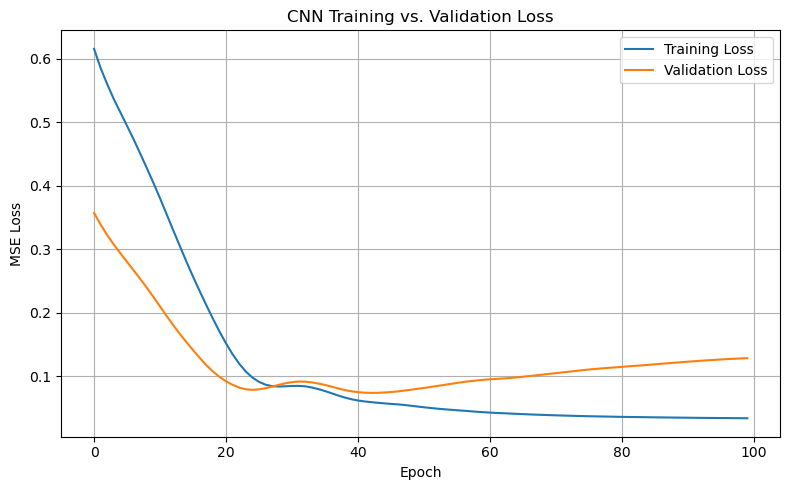

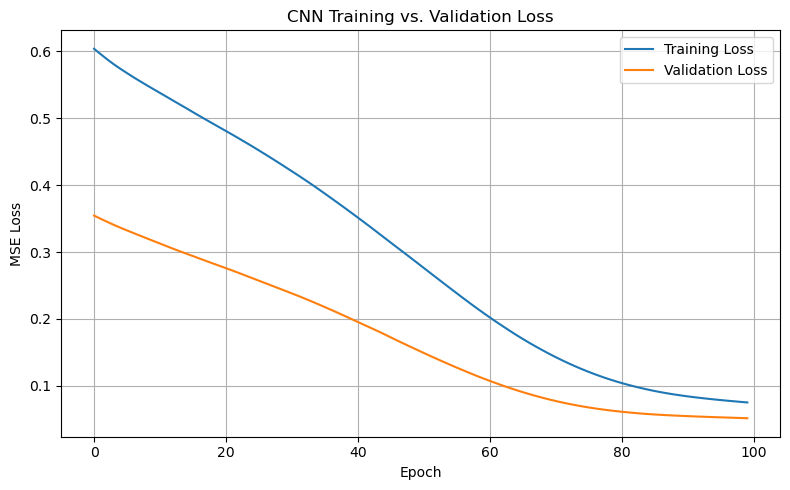

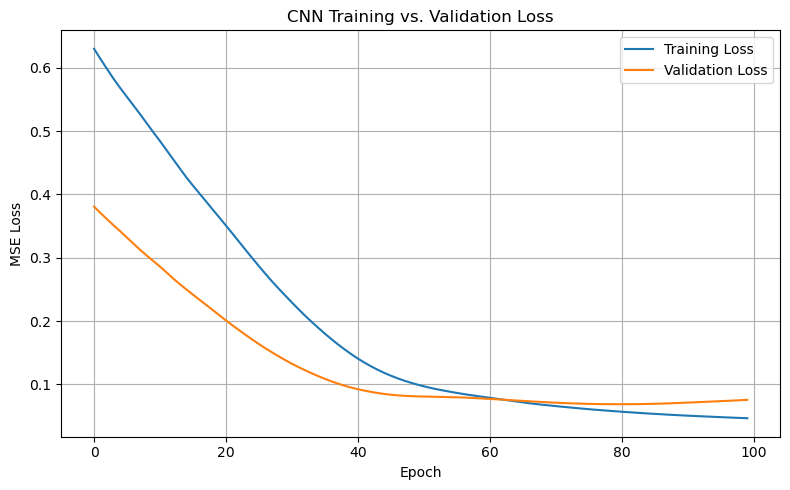

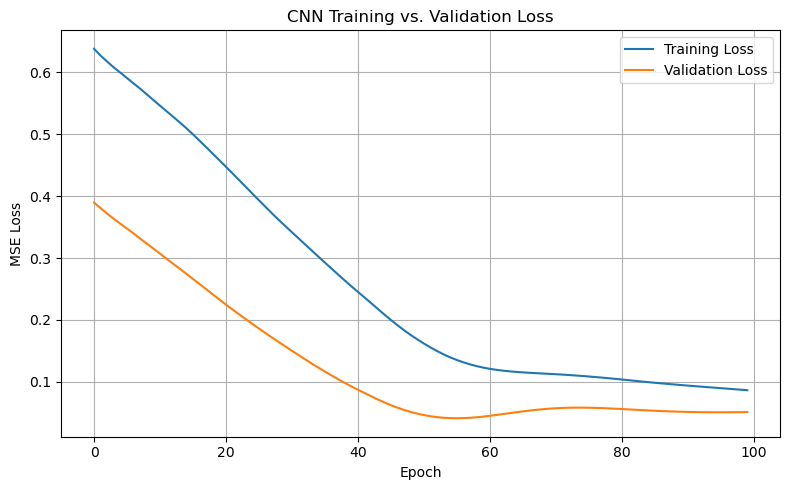

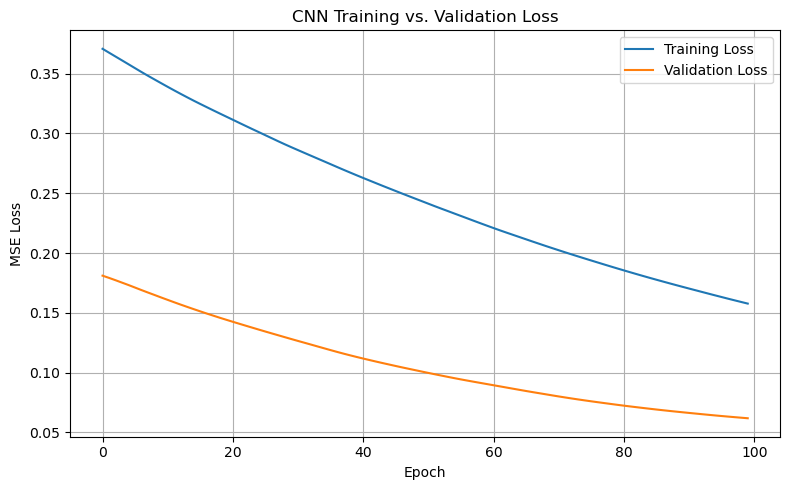

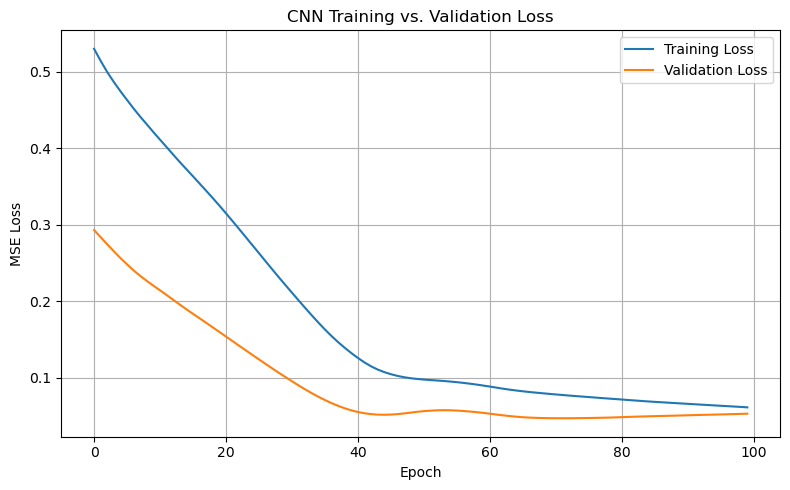

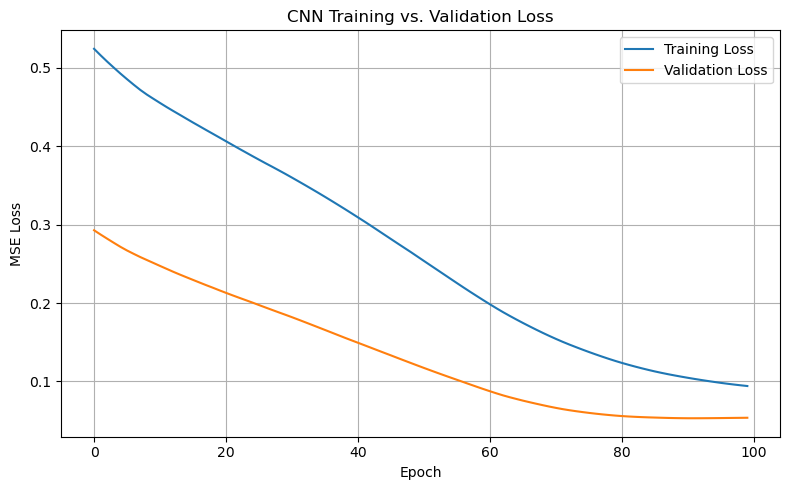

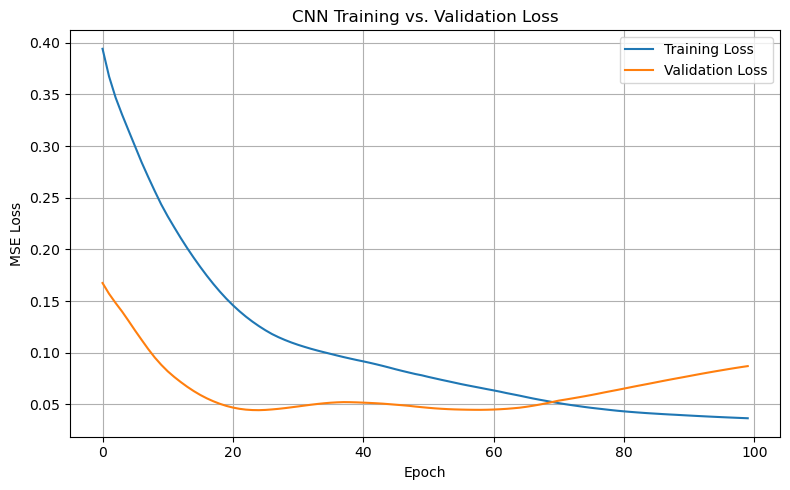

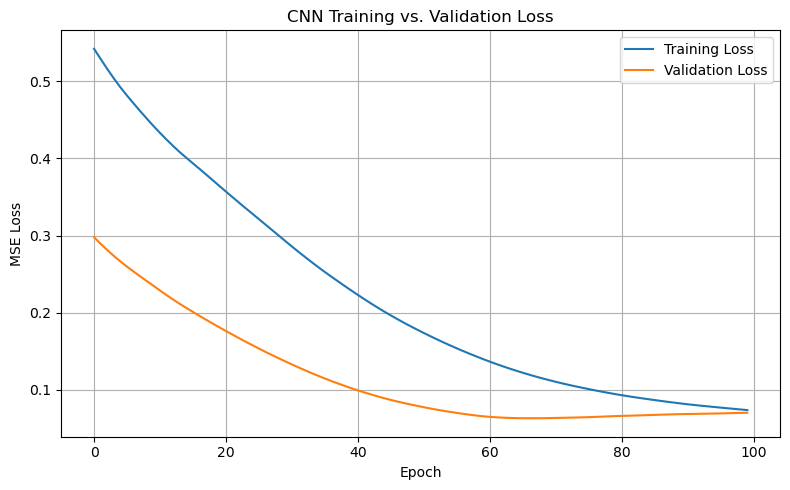

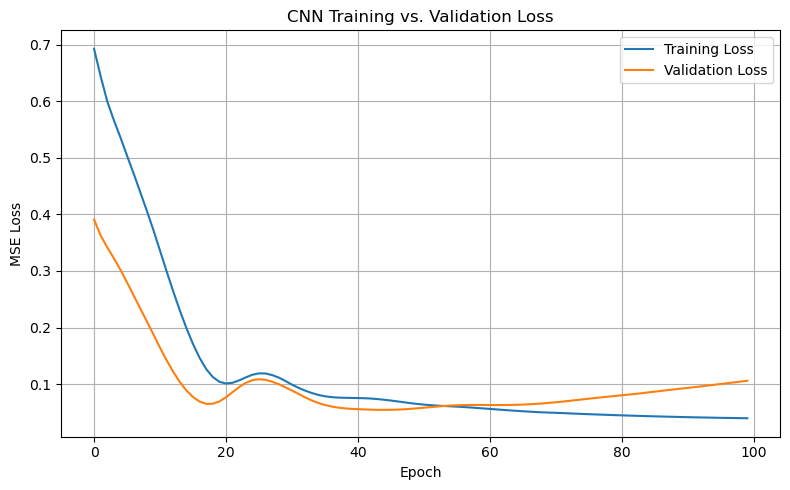

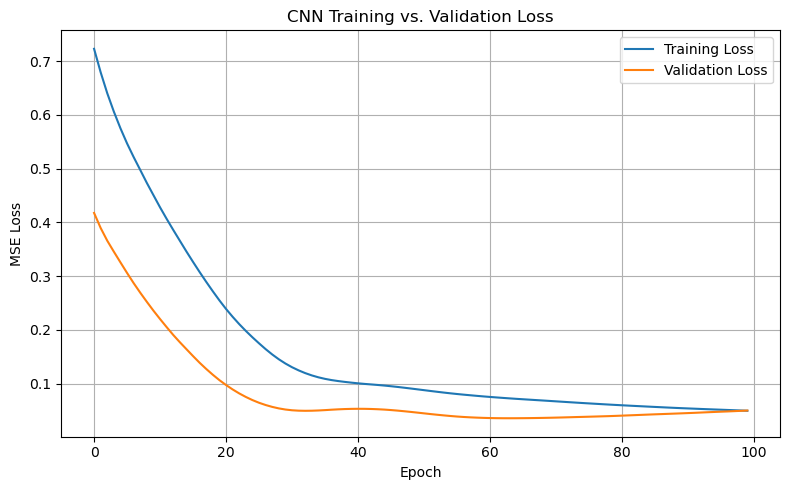

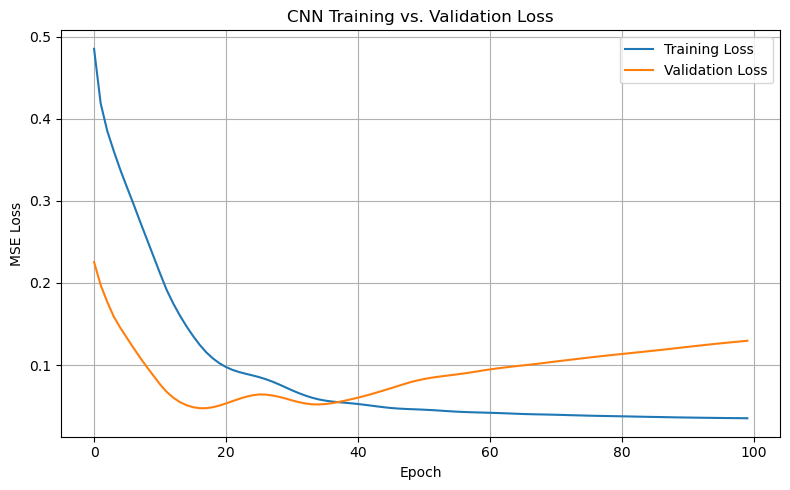

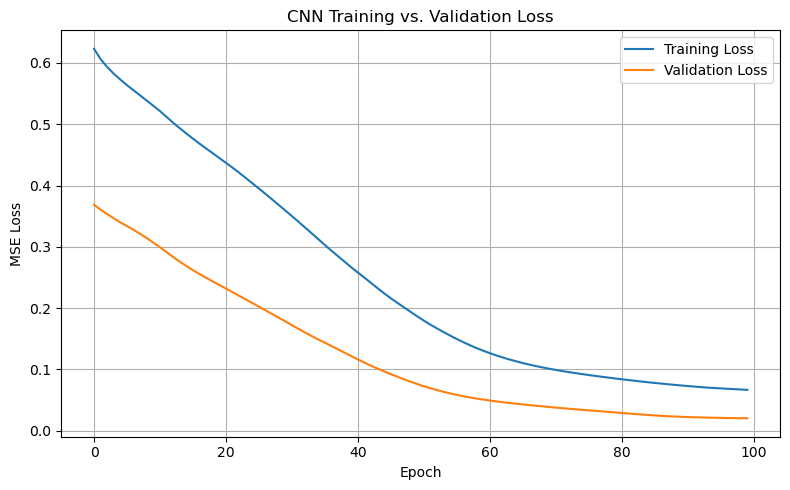

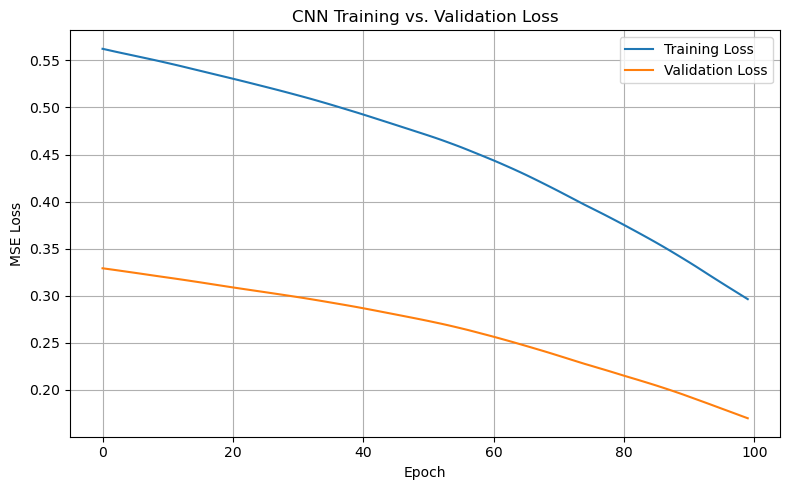

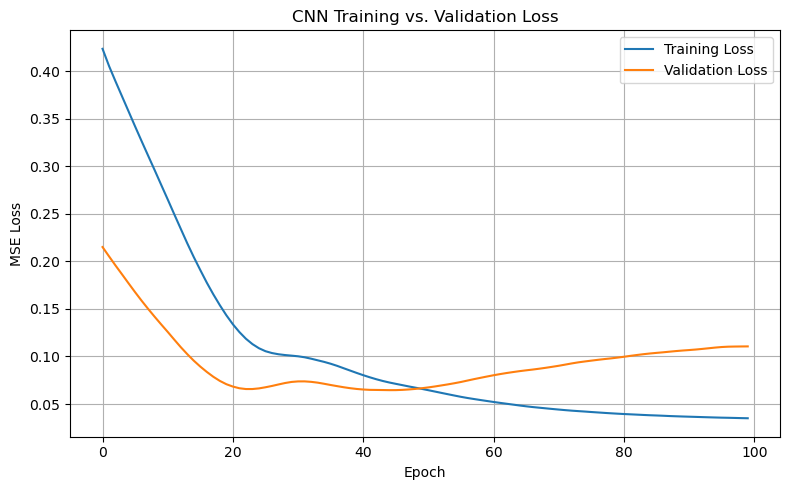

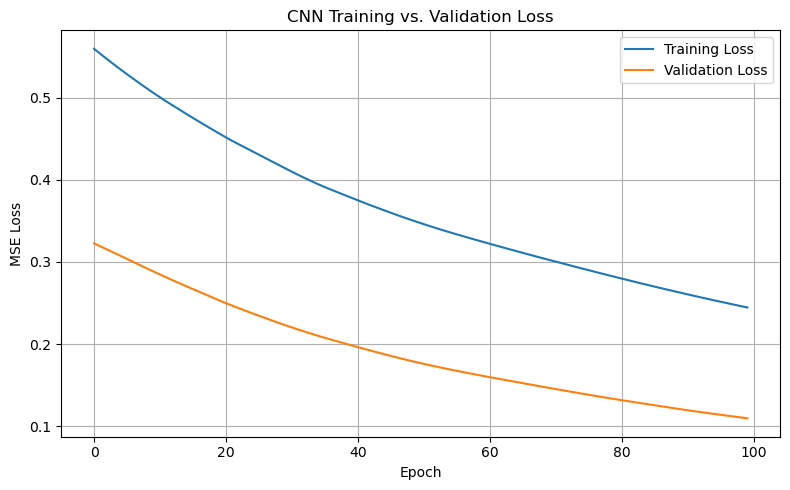

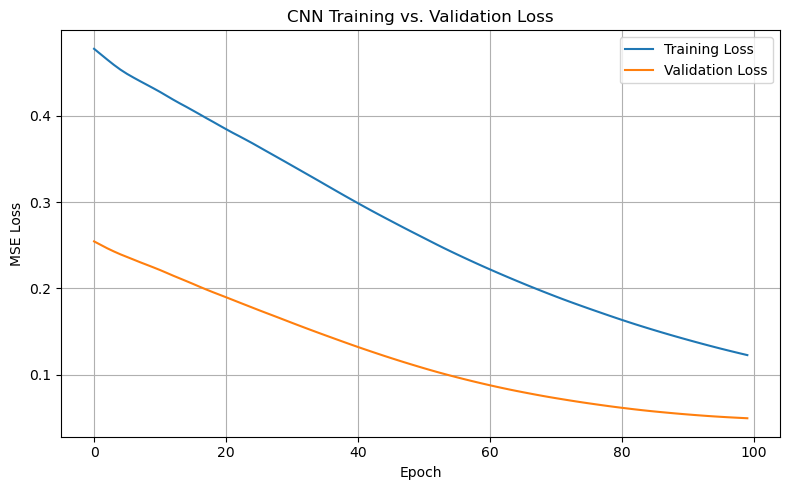

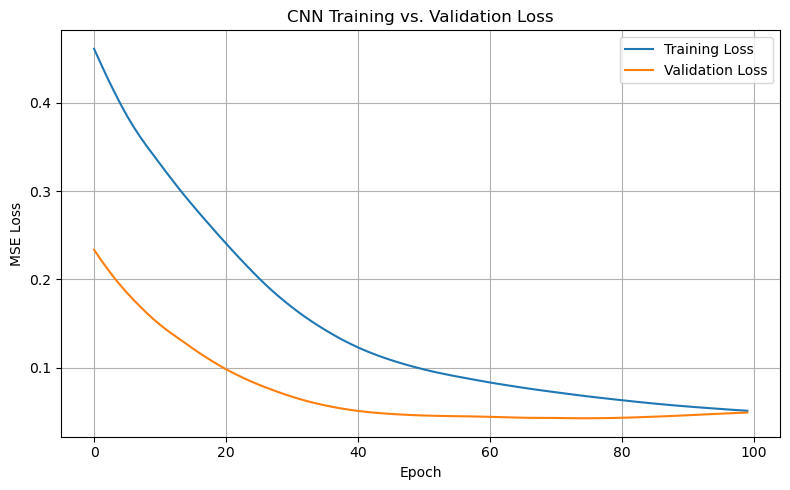

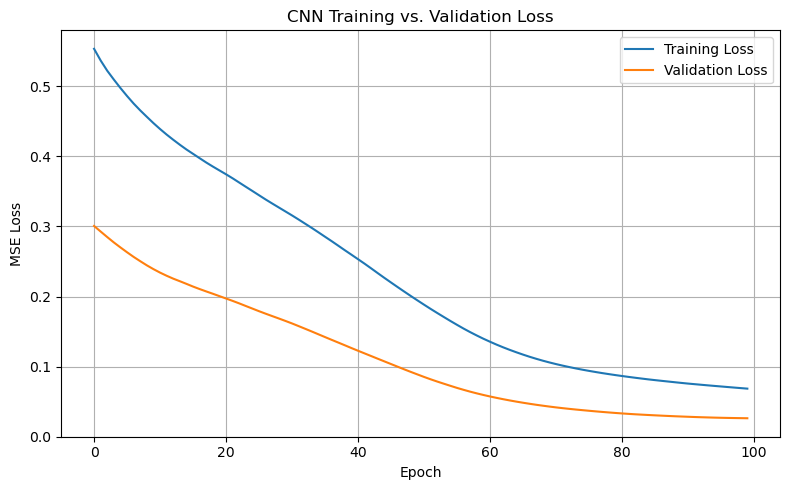

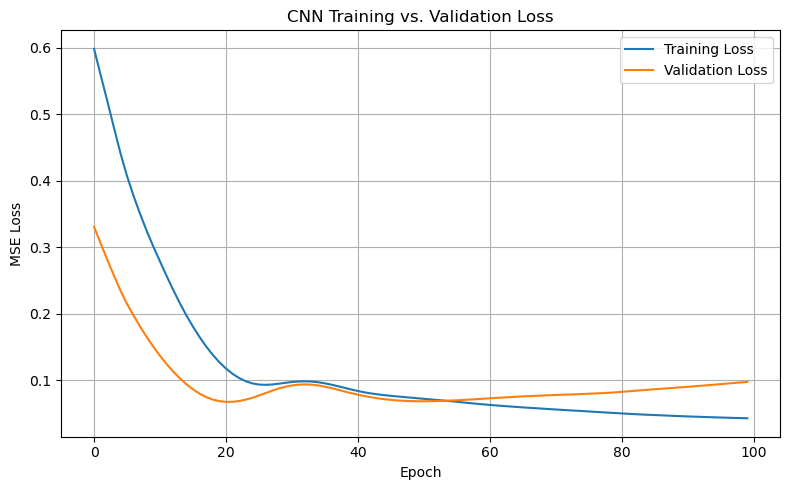

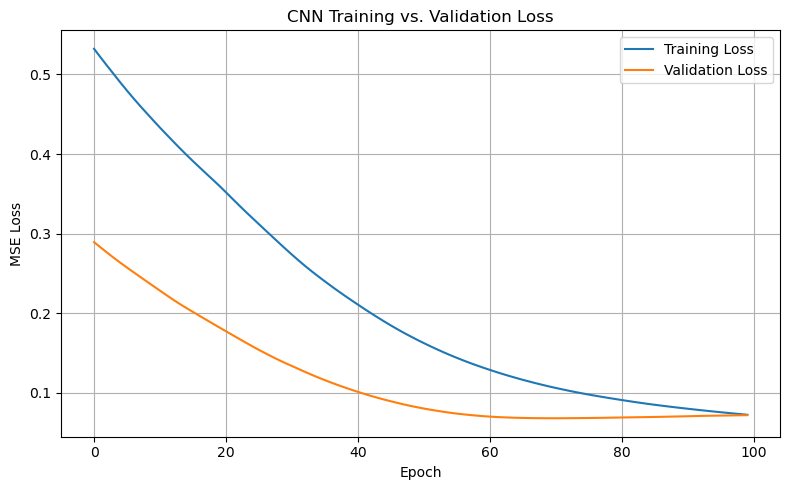

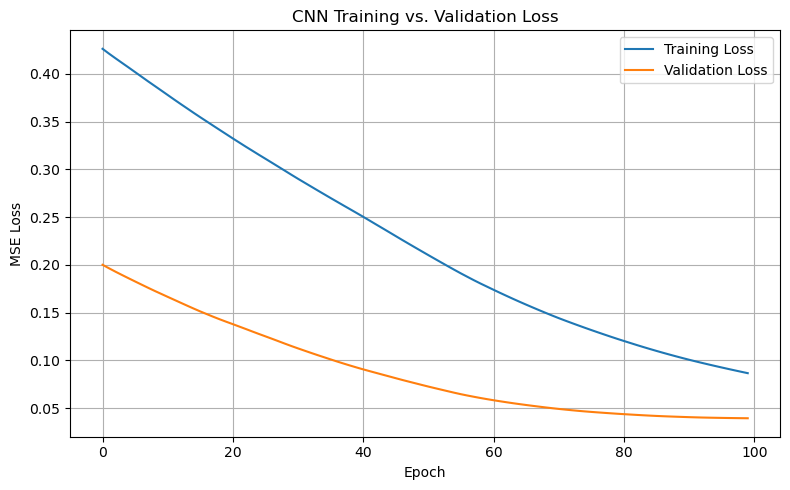

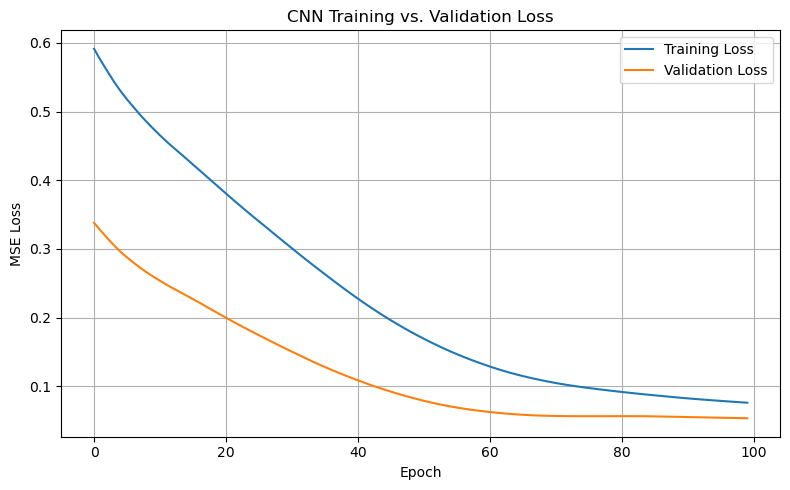

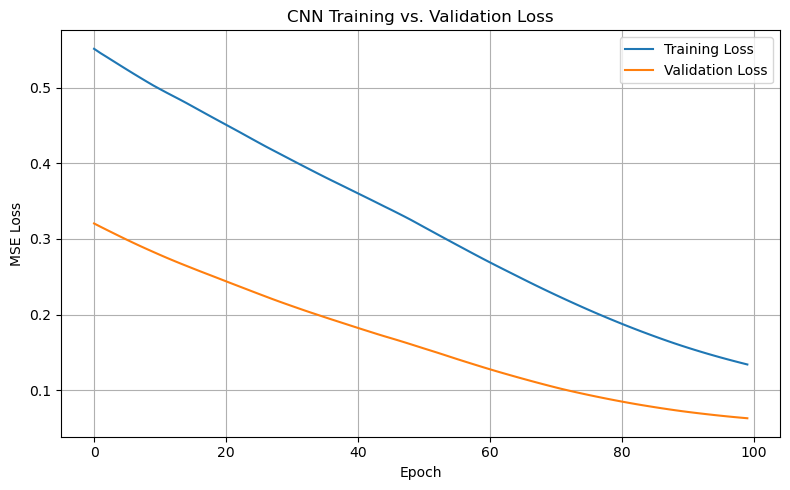

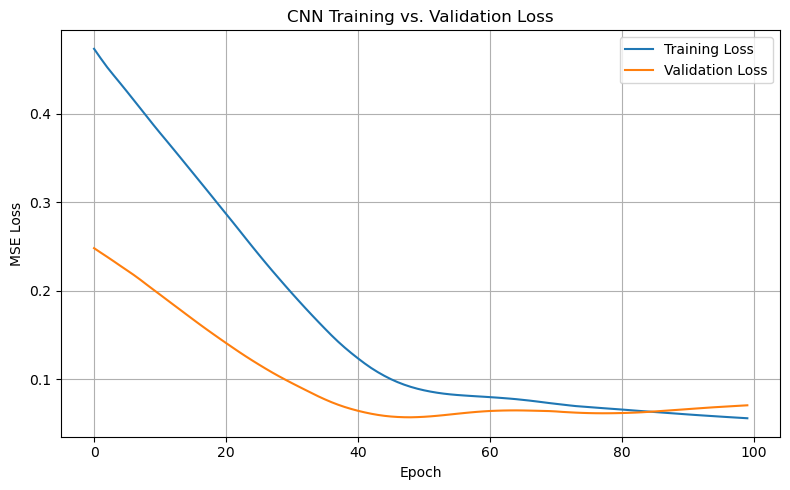

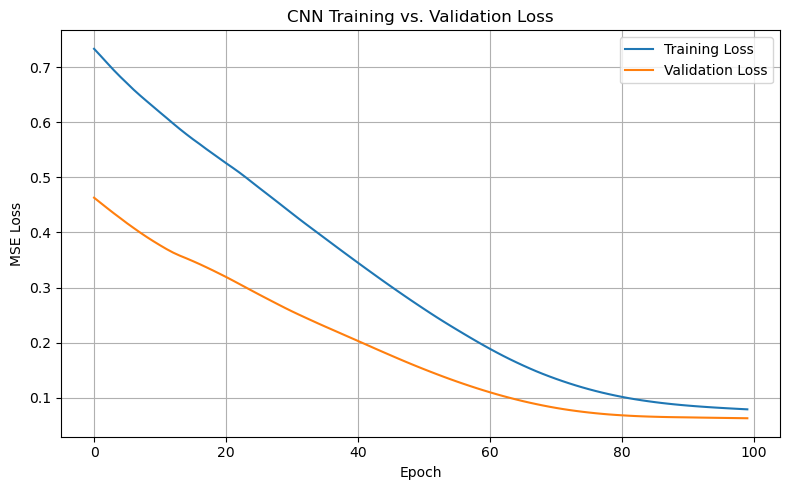

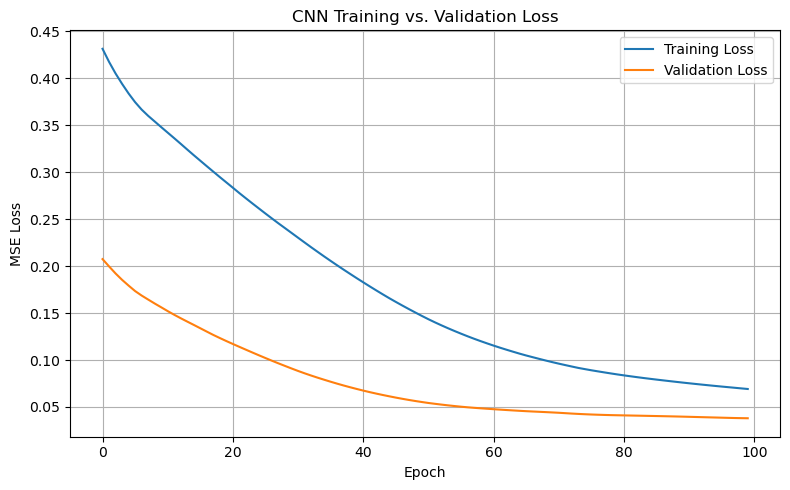

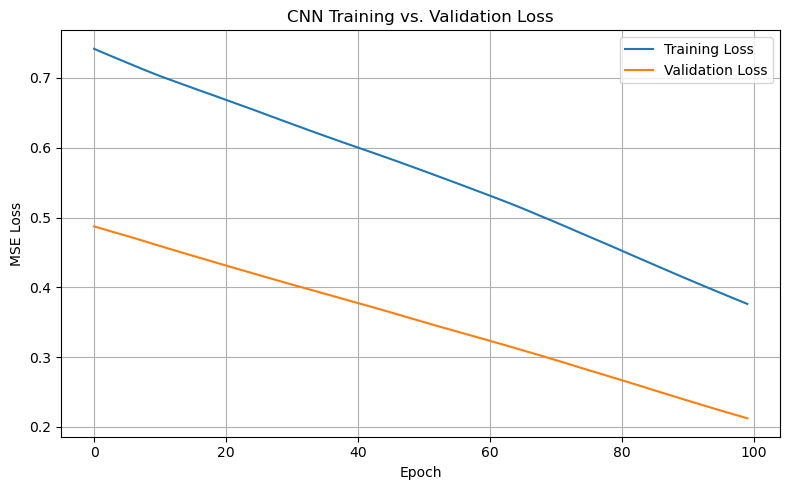


🔥 CNN Ensemble Evaluation:
R²: -0.4655
MAE: 242.3762
MSE: 66889.7868
Ensemble metrics: {'R²': -0.4655093820708953, 'MAE': 242.37622833251953, 'MSE': 66889.78675417998}
Averaged Ensemble Predictions: [      nan       nan       nan 842.40704 830.27856]
True values: [nan, 645, 1160, 690, 790, nan, 670]


posx and posy should be finite values
posx and posy should be finite values


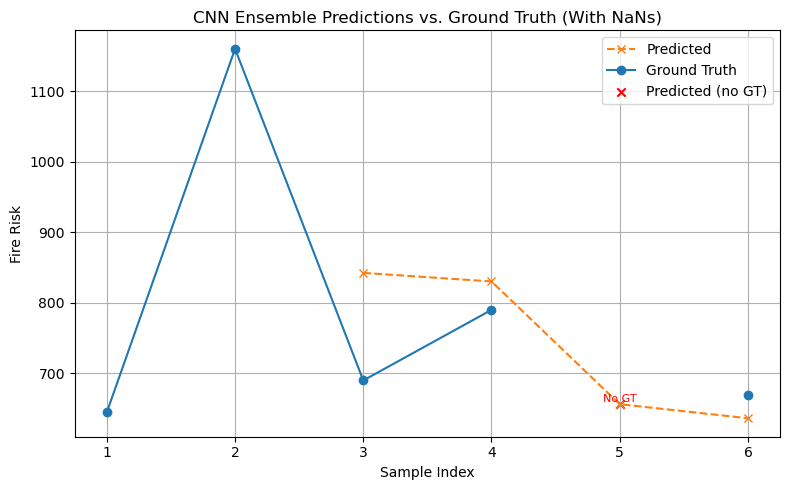

In [ ]:
# 🔧 2. Train CNN ensemble (50 runs) and save
models, metrics_list, ensemble_metrics = train_multiple_cnn_for_fire(
    train_path, n_runs=50, save=True,scale_mode="minmax")

print("Ensemble metrics:", ensemble_metrics)

# 🔍 4. Load and test ensemble prediction
models, scaler_X, scaler_y, feature_names = load_model_bundle("cnn_ensemble.joblib")
avg_preds = predict_fire_risk_from_models(
    models,
    scaler_X,
    scaler_y,
    test_path,
    feature_names=feature_names,
    model_type="cnn"
)
print("Averaged Ensemble Predictions:", avg_preds[:5])

# ✅ Ground truth
true_values = [np.nan, 645, 1160, 690, 790, np.nan, 670]
print("True values:", true_values)

# ✅ Plot predicted vs. ground truth (with NaNs preserved)
from regressorpipeline.visualize import plot_predictions_with_nan

plot_predictions_with_nan(
    true_values=true_values,
    predicted_values=avg_preds,
    title="CNN Ensemble Predictions vs. Ground Truth (With NaNs)")

In [ ]:
# 6. Generate CNN surface plot
# Load model bundle
models, scaler_X, scaler_y, feature_names = load_model_bundle("best_cnn_model.joblib")
scale_mode = "log_minmax"  # or retrieve from model bundle if stored

# Call the updated plotting function (handles data loading and preprocessing)
plot_fire_risk_surface_matplotlib(
    model=models[0],
    scaler_X=scaler_X,
    scaler_y=scaler_y,
    feature_names=feature_names,
    feat1_name="ThermalInertia",
    feat2_name="FuelLoadDensity",
    data_path=test_path,
    scale_mode="log_minmax",
    title="CNN Prediction Surface",
    save_path="examples/cnn_surface.html"
)


print("Surface plot saved to examples/cnn_surface.html")

✅ 3D surface plot saved to: examples/cnn_surface.html
Surface plot saved to examples/cnn_surface.html
